# PCA and Dimension Reduction
Execute the below code and answer the following questions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,0.922486,1.047879,-2.963721,-0.056906,1.265347,3.858544,0.491978,-0.490947,-4.320868,0.593099,...,0.536582,-0.725250,1.331478,1.185142,-2.963721,1.314720,2.487634,-0.424585,0.995500,1.0
1,1.210683,-2.384247,2.590403,-2.600047,-1.039447,-0.687409,0.847554,-0.563711,-4.944035,0.357768,...,-1.811372,-1.981515,0.212563,1.569957,2.590403,2.475946,0.866024,1.414244,0.337811,0.0
2,0.428323,-4.476885,8.180427,-4.260930,-1.435362,-6.440634,4.620321,-1.400001,-7.511350,1.946596,...,-2.506842,0.704681,-2.628639,3.458000,8.180427,3.718988,0.771003,-1.153540,-0.148205,0.0
3,-0.631406,0.255251,-4.260573,1.140672,-0.738570,5.966119,-5.335446,-0.729138,5.655376,-0.852272,...,-0.733406,1.295768,-1.049316,3.925402,-4.260573,-4.457084,-2.563916,-1.388560,0.179481,2.0
4,-1.217200,-3.333409,4.420645,1.231249,-0.081330,-2.874278,1.404699,0.680510,4.243968,2.281619,...,2.104220,1.120948,-1.349871,-1.680847,4.420645,-3.035590,-1.190401,-0.421525,-0.883157,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [3]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (Use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train_scale = s.fit_transform(X_train)

p = PCA()
X_train_pca = p.fit_transform(X_train_scale)

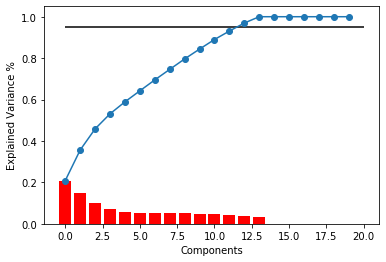

In [5]:
evr = p.explained_variance_ratio_

plt.plot(np.cumsum(evr), '-o')
plt.bar(np.arange(np.size(evr)), evr, color='red')
plt.ylabel('Explained Variance %')
plt.xlabel('Components')
plt.hlines(.95, 0, np.size(evr))
plt.show()

> At the 12th component the total variance is 95%, which is what I would recommend using, as 95% is the general rule of thumb.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

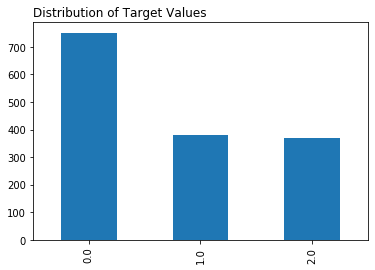

In [6]:
df['target'].value_counts().plot.bar()
plt.title('Distribution of Target Values', loc='left')
plt.show()

> Since the distribution is skewed, accuracy would be misleading. I would choose either recall or precision, depending on the use-case. Accuracy would skew towards the plurity class and recall would allow us to understand the ability for the model to recall the actual labels, which likely has a higher value then too many false positives.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

rpi = Pipeline([
    ('scale', StandardScaler()),
    ('glm', LogisticRegression(solver='liblinear'))]
)

params = {
    'glm__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'glm__class_weight': [None, 'balanced']
}

rpi = GridSearchCV(rpi, param_grid = params, scoring='recall_macro')
rpi = rpi.fit(X_train, y_train)

rpi.best_estimator_

Pipeline(steps=[('scale', StandardScaler()),
                ('glm',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    solver='liblinear'))])

In [10]:
print(f'Validation score: {rpi.best_score_:.2%}')
print(f'Full training score: {rpi.score(X_train, y_train):.2%}')
print(f'Test score: {rpi.score(X_test, y_test):.2%}')

Validation score: 71.14%
Full training score: 72.73%
Test score: 70.33%


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rpi.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75       149
         1.0       0.63      0.62      0.63        73
         2.0       0.64      0.78      0.70        78

    accuracy                           0.71       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.72      0.71      0.71       300



> Best results so far on `C=0.1` using balanced classes. CV score was 72%, 73% on entire training data, and test 71%. Will search around `C=0.1` using balanced to target a better value.

In [12]:
rpi = Pipeline([
    ('scale', StandardScaler()),
    ('glm', LogisticRegression(solver='liblinear'))]
)

params = {
    'glm__C': [0.3, 0.7, 0.9, 0.1, 0.25, 0.50, 0.80],
    'glm__class_weight': [None, 'balanced']
}

rpi = GridSearchCV(rpi, param_grid = params, scoring='recall_macro')
rpi = rpi.fit(X_train, y_train)

rpi.best_estimator_

Pipeline(steps=[('scale', StandardScaler()),
                ('glm',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    solver='liblinear'))])

> Refined search finds `C=0.1` as the "best", so we'll proceed with that as the non-PCA champion.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pi = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('glm', LogisticRegression(solver='liblinear'))]
)

params = {
    'pca__n_components': [8, 11, 12, 13, 14],
    'glm__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'glm__class_weight': [None, 'balanced']
}

pi = GridSearchCV(pi, param_grid = params, scoring='recall_macro')
pi = pi.fit(X_train, y_train)

pi.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=14)),
                ('glm',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    solver='liblinear'))])

In [14]:
print(f'Validation score: {rpi.best_score_:.2%}')
print(f'Full training score: {rpi.score(X_train, y_train):.2%}')
print(f'Test score: {rpi.score(X_test, y_test):.2%}')

Validation score: 71.14%
Full training score: 72.73%
Test score: 70.33%


> Best model was regularization strength of 0.1, unweighted classes, and 13 principle components.

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pi.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75       149
         1.0       0.63      0.62      0.63        73
         2.0       0.64      0.78      0.70        78

    accuracy                           0.71       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.72      0.71      0.71       300



> Test accuracy is 70% and precision and recall are about 68% each. CV accuracy is 72% and overall training is 73%, so no evidence of overfitting. Performance is nearly identical to the above logistic regression.

> More targeted searches around 13 components and the `C=0.1` regularization strength.

In [16]:
pi = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('glm', LogisticRegression(solver='liblinear'))]
)

params = {
    'pca__n_components': [12, 13, 14, 15, 16],
    'glm__C': [0.06, 0.08, 0.1, 0.25, 0.60, 0.80],
    'glm__class_weight': [None, 'balanced']
}

pi = GridSearchCV(pi, param_grid = params, scoring='recall_macro')
pi = pi.fit(X_train, y_train)

pi.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=14)),
                ('glm',
                 LogisticRegression(C=0.06, class_weight='balanced',
                                    solver='liblinear'))])

In [17]:
print(f'Validation score: {rpi.best_score_:.2%}')
print(f'Full training score: {rpi.score(X_train, y_train):.2%}')
print(f'Test score: {rpi.score(X_test, y_test):.2%}')

Validation score: 71.14%
Full training score: 72.73%
Test score: 70.33%


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pi.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75       149
         1.0       0.64      0.62      0.63        73
         2.0       0.63      0.78      0.70        78

    accuracy                           0.71       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.72      0.71      0.71       300



> Seeing no significant difference in the models using the more focused hyperparameters. Statistically irrelevant performance gain with slightly more regularization, but effectively the same.

In [19]:
from sklearn.metrics import classification_report

print('Regular Logistic Regression:')
print(classification_report(y_test, rpi.predict(X_test)))

Regular Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75       149
         1.0       0.63      0.62      0.63        73
         2.0       0.64      0.78      0.70        78

    accuracy                           0.71       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.72      0.71      0.71       300



In comparing the PCA and non-PCA processing, the accuracies about about the same (71%), but the non-PCA logistic regression has slightly higher recall on the test data, so we'll prefer that model. In addition, it is also more interpretable in case we need to analyze the individual feature importances.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

pine = Pipeline([
    ('tr', DecisionTreeClassifier())]
)

pparams = {
    'tr__max_depth': [4, 6, 8, 10, 12],
    'tr__min_samples_split': [0.01, 0.02, 0.04, 0.06, 0.08],
    'tr__class_weight': [None, 'balanced']
}

pine = GridSearchCV(pine, param_grid = pparams, scoring='recall_macro')
pine = pine.fit(X_train, y_train)

pine.best_estimator_

Pipeline(steps=[('tr',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                                        min_samples_split=0.02))])

In [22]:
print(f'Validation score: {pine.best_score_:.2%}')
print(f'Full training score: {pine.score(X_train, y_train):.2%}')
print(f'Test score: {pine.score(X_test, y_test):.2%}')

Validation score: 71.89%
Full training score: 87.42%
Test score: 74.27%


> Decision trees have 73-74% accuracy on CV and test sets, however, the training has a 84% accuracy, so there is evidence of overfitting.

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pine.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78       149
         1.0       0.62      0.73      0.67        73
         2.0       0.77      0.74      0.76        78

    accuracy                           0.75       300
   macro avg       0.73      0.74      0.74       300
weighted avg       0.75      0.75      0.75       300



Recall for the base tree is ~72% and precision is ~73%. Performing more targeted search:

In [24]:
pine = Pipeline([
    ('tr', DecisionTreeClassifier())]
)

pparams = {
    'tr__max_depth': [4, 5, 6, 7, 8],
    'tr__min_samples_split': [0.01, 0.02],
    'tr__class_weight': [None, 'balanced']
}

pine = GridSearchCV(pine, param_grid = pparams, scoring='recall_macro')
pine = pine.fit(X_train, y_train)

pine.best_estimator_

Pipeline(steps=[('tr',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                                        min_samples_split=0.02))])

In [25]:
print(f'Validation score: {pine.best_score_:.2%}')
print(f'Full training score: {pine.score(X_train, y_train):.2%}')
print(f'Test score: {pine.score(X_test, y_test):.2%}')

Validation score: 72.28%
Full training score: 87.42%
Test score: 73.82%


Slightly higher test accuracy using `max depth of 7`, however, the amount of overfitting increased, i.e., delta between training and test accuracy.

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pine.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       149
         1.0       0.61      0.73      0.66        73
         2.0       0.77      0.74      0.76        78

    accuracy                           0.74       300
   macro avg       0.73      0.74      0.73       300
weighted avg       0.75      0.74      0.74       300



Performance on the test data is essentially the same between the base and refined decision tree models, so all else constant, we'd prefer the latter model, however, due to the overfitting and performance purity, we'd prefer the logistic regression models.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

pine = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('tr', DecisionTreeClassifier())]
)

pparams = {
    'pca__n_components': [4, 8, 11, 12, 13],
    'tr__max_depth': [4, 6, 8, 10, 12],
    'tr__min_samples_split': [0.01, 0.02, 0.04, 0.06, 0.08],
    'tr__class_weight': [None, 'balanced']
}

pine = GridSearchCV(pine, param_grid = pparams, scoring='recall_macro')
pine = pine.fit(X_train, y_train)

pine.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=13)),
                ('tr',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                                        min_samples_split=0.01))])

> Best model was 13 components, depth of 8, a minimum sample split of 2% of samples, and no class weights.

In [45]:
print(f'Validation score: {pine.best_score_:.2%}')
print(f'Full training score: {pine.score(X_train, y_train):.2%}')
print(f'Test score: {pine.score(X_test, y_test):.2%}')

Validation score: 71.67%
Full training score: 81.33%
Test score: 69.33%


> There seems to be overfitting, i.e., 15 point accuracy drop-off between training and test. However, there is less overfitting, as expected, when using PCA than not using it, since we have a simpler feature set. The validation and test scores are lower as well, which again is not unexpected.

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pine.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       149
         1.0       0.64      0.68      0.66        73
         2.0       0.81      0.74      0.77        78

    accuracy                           0.75       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.75      0.75      0.75       300



> Accuracy was 68-69% of the test, with precision and recall at 65-68%.

> Searching for more targeted values:

In [57]:
pine = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('tr', DecisionTreeClassifier())]
)

pparams = {
    'pca__n_components': [11, 12, 13, 14, 15],
    'tr__max_depth': [6, 7, 8, 9, 10],
    'tr__min_samples_split': [0.01, 0.02, 0.03, 0.04],
    'tr__class_weight': [None, 'balanced']
}

pine = GridSearchCV(pine, param_grid = pparams)
pine = pine.fit(X_train, y_train)

pine.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=15)),
                ('tr',
                 DecisionTreeClassifier(max_depth=6, min_samples_split=0.02))])

Refined search comes up with `14 components`, a `max depth of 6` and `minimum samples of 2% in the splits`.

In [46]:
print(f'Validation score: {pine.best_score_:.2%}')
print(f'Full training score: {pine.score(X_train, y_train):.2%}')
print(f'Test score: {pine.score(X_test, y_test):.2%}')

Validation score: 71.67%
Full training score: 81.33%
Test score: 69.33%


In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pine.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.77      0.75       149
         1.0       0.61      0.63      0.62        73
         2.0       0.68      0.62      0.64        78

    accuracy                           0.69       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.69      0.69      0.69       300



More targeted search has minor performance gains versus the original search space, however, neither do as well as the logistic regression - about 2 points less in terms of accuracy while exhibiting overfitting. Within the logistic regressions, I'd prefer the non-PCA version, as we see no evidence of overfitting and the performance marks are about the same, and the underlying model will be more intrepretable.